In [1]:
lincs --help

Usage: lincs [OPTIONS] COMMAND [ARGS]...

  lincs (Learn and Infer Non-Compensatory Sorting) is a set of tools for
  training and using MCDA models.

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  classification-accuracy  Compute a classification accuracy.
  classify                 Classify alternatives.
  describe                 Provide human-readable descriptions.
  generate                 Generate synthetic data.
  info                     Get information about lincs itself.
  learn                    Learn a model.
  visualize                Make graphs from data.


In [2]:
lincs generate classification-problem 4 3 --output-problem problem.yml
cat problem.yml

# Reproduction command (with lincs version 1.1.0a5): lincs generate classification-problem 4 3 --random-seed 40
kind: classification-problem
format_version: 1
criteria:
  - name: Criterion 1
    value_type: real
    preference_direction: increasing
    min_value: 0
    max_value: 1
  - name: Criterion 2
    value_type: real
    preference_direction: increasing
    min_value: 0
    max_value: 1
  - name: Criterion 3
    value_type: real
    preference_direction: increasing
    min_value: 0
    max_value: 1
  - name: Criterion 4
    value_type: real
    preference_direction: increasing
    min_value: 0
    max_value: 1
ordered_categories:
  - name: Worst category
  - name: Intermediate category 1
  - name: Best category


In [3]:
lincs describe classification-problem problem.yml

This a classification problem into 3 ordered categories named "Worst category", "Intermediate category 1" and "Best category".
The best category is "Best category" and the worst category is "Worst category".
There are 4 classification criteria (in no particular order).
Criterion "Criterion 1" takes real values between 0.0 and 1.0 included.
Higher values of "Criterion 1" are known to be better.
Criterion "Criterion 2" takes real values between 0.0 and 1.0 included.
Higher values of "Criterion 2" are known to be better.
Criterion "Criterion 3" takes real values between 0.0 and 1.0 included.
Higher values of "Criterion 3" are known to be better.
Criterion "Criterion 4" takes real values between 0.0 and 1.0 included.
Higher values of "Criterion 4" are known to be better.


In [4]:
lincs generate classification-model problem.yml --output-model model.yml
cat model.yml

# Reproduction command (with lincs version 1.1.0a5): lincs generate classification-model problem.yml --random-seed 41 --model-type mrsort
kind: ncs-classification-model
format_version: 1
accepted_values:
  - kind: thresholds
    thresholds: [0.255905151, 0.676961303]
  - kind: thresholds
    thresholds: [0.0551739037, 0.324553937]
  - kind: thresholds
    thresholds: [0.162252158, 0.673279881]
  - kind: thresholds
    thresholds: [0.0526000932, 0.598555863]
sufficient_coalitions:
  - &coalitions
    kind: weights
    criterion_weights: [0.147771254, 0.618687689, 0.406786472, 0.0960085914]
  - *coalitions


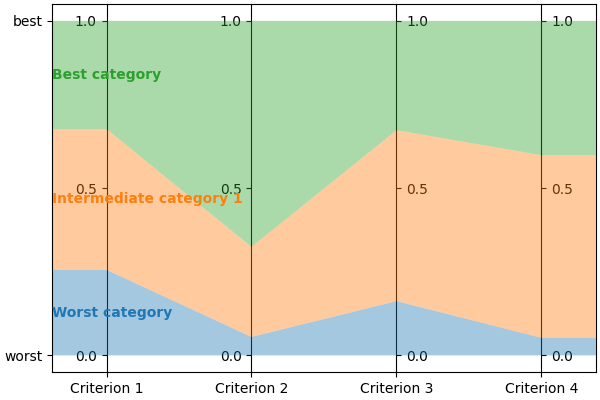

In [5]:
rm -f model.png
lincs visualize classification-model problem.yml model.yml model.png
cat model.png | display

In [6]:
lincs describe classification-model problem.yml model.yml

This is a MR-Sort (a.k.a. 1-Uc-NCS) model: an NCS model where the sufficient coalitions are specified using the same criterion weights for all boundaries.
The weights associated to each criterion are:
  - Criterion "Criterion 1": 0.15
  - Criterion "Criterion 2": 0.62
  - Criterion "Criterion 3": 0.41
  - Criterion "Criterion 4": 0.10
To get into an upper category, an alternative must be better than the following profiles on a set of criteria whose weights add up to at least 1:
  - For category "Intermediate category 1": at least 0.26 on criterion "Criterion 1", at least 0.06 on criterion "Criterion 2", at least 0.16 on criterion "Criterion 3", and at least 0.05 on criterion "Criterion 4"
  - For category "Best category": at least 0.68 on criterion "Criterion 1", at least 0.32 on criterion "Criterion 2", at least 0.67 on criterion "Criterion 3", and at least 0.60 on criterion "Criterion 4"


In [7]:
lincs generate classified-alternatives problem.yml model.yml 1000 --output-alternatives learning-set.csv
head -n 7 learning-set.csv

# Reproduction command (with lincs version 1.1.0a5): lincs generate classified-alternatives problem.yml model.yml 1000 --random-seed 42 --misclassified-count 0
name,"Criterion 1","Criterion 2","Criterion 3","Criterion 4",category
"Alternative 1",0.37454012,0.796543002,0.95071429,0.183434784,"Best category"
"Alternative 2",0.731993914,0.779690981,0.598658502,0.596850157,"Intermediate category 1"
"Alternative 3",0.156018645,0.445832759,0.15599452,0.0999749228,"Worst category"
"Alternative 4",0.0580836125,0.4592489,0.866176128,0.333708614,"Best category"
"Alternative 5",0.601114988,0.14286682,0.708072603,0.650888503,"Intermediate category 1"


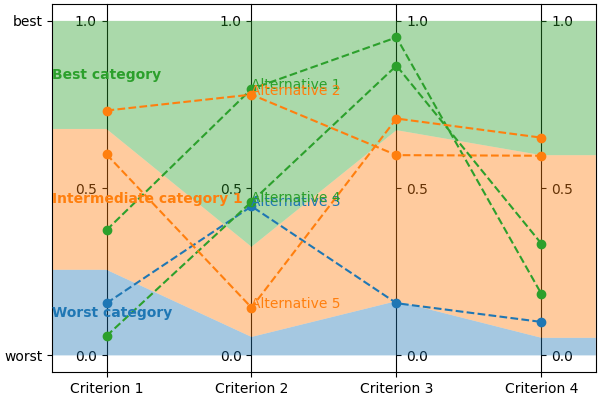

In [8]:
rm -f alternatives.png
lincs visualize classification-model problem.yml model.yml --alternatives learning-set.csv --alternatives-count 5 alternatives.png
cat alternatives.png | display

In [9]:
lincs learn classification-model problem.yml learning-set.csv --output-model trained-model.yml
cat trained-model.yml

# Reproduction command (with lincs version 1.1.0a5): lincs learn classification-model problem.yml learning-set.csv --model-type mrsort --mrsort.strategy weights-profiles-breed --mrsort.weights-profiles-breed.models-count 9 --mrsort.weights-profiles-breed.accuracy-heuristic.random-seed 43 --mrsort.weights-profiles-breed.initialization-strategy maximize-discrimination-per-criterion --mrsort.weights-profiles-breed.weights-strategy linear-program --mrsort.weights-profiles-breed.linear-program.solver glop --mrsort.weights-profiles-breed.profiles-strategy accuracy-heuristic --mrsort.weights-profiles-breed.accuracy-heuristic.processor cpu --mrsort.weights-profiles-breed.breed-strategy reinitialize-least-accurate --mrsort.weights-profiles-breed.reinitialize-least-accurate.portion 0.5 --mrsort.weights-profiles-breed.target-accuracy 1.0
kind: ncs-classification-model
format_version: 1
accepted_values:
  - kind: thresholds
    thresholds: [0.339874953, 0.421424538]
  - kind: thresholds
    thresh

In [10]:
lincs generate classified-alternatives problem.yml model.yml 3000 --output-alternatives testing-set.csv

In [11]:
lincs classify problem.yml trained-model.yml testing-set.csv --output-alternatives reclassified-testing-set.csv
diff testing-set.csv reclassified-testing-set.csv

522c522
< "Alternative 520",0.617141366,0.326259822,0.901315808,0.460642993,"Best category"
---
> "Alternative 520",0.617141366,0.326259822,0.901315808,0.460642993,"Intermediate category 1"
615c615
< "Alternative 613",0.547554553,0.0552174859,0.690436542,0.511019647,"Intermediate category 1"
---
> "Alternative 613",0.547554553,0.0552174859,0.690436542,0.511019647,"Worst category"
2596c2596
< "Alternative 2594",0.234433308,0.780464768,0.162389532,0.622178912,"Intermediate category 1"
---
> "Alternative 2594",0.234433308,0.780464768,0.162389532,0.622178912,"Worst category"
2610c2610
< "Alternative 2608",0.881479025,0.055544015,0.82936728,0.853676081,"Intermediate category 1"
---
> "Alternative 2608",0.881479025,0.055544015,0.82936728,0.853676081,"Worst category"


In [12]:
lincs classification-accuracy problem.yml trained-model.yml testing-set.csv

2996/3000
